In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
genres=pd.read_csv('genres_v2.csv')

C:\Users\asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
genres.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [4]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [4]:
genres=genres.drop('Unnamed: 0',axis=1)

In [6]:
genres.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
title               21525
dtype: int64

In [7]:
genres[genres['song_name'].isnull()].head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,title
18597,0.714,0.821,6,-7.635,1,0.1760,0.04100,0.000000,0.116,0.649,...,audio_features,69gRFGOWY9OMpFJgFol1u0,spotify:track:69gRFGOWY9OMpFJgFol1u0,https://api.spotify.com/v1/tracks/69gRFGOWY9OM...,https://api.spotify.com/v1/audio-analysis/69gR...,282707,4,Hiphop,NaN,NaN
19677,0.811,0.445,8,-10.105,1,0.2740,0.04530,0.000000,0.109,0.250,...,audio_features,13q8un4Xjs3IOfdem4jgVe,spotify:track:13q8un4Xjs3IOfdem4jgVe,https://api.spotify.com/v1/tracks/13q8un4Xjs3I...,https://api.spotify.com/v1/audio-analysis/13q8...,154082,4,Hiphop,NaN,NaN
19678,0.763,0.654,11,-9.423,0,0.5060,0.08750,0.000003,0.139,0.277,...,audio_features,7B2NTZXEPeshkufbqT1gMN,spotify:track:7B2NTZXEPeshkufbqT1gMN,https://api.spotify.com/v1/tracks/7B2NTZXEPesh...,https://api.spotify.com/v1/audio-analysis/7B2N...,160522,4,Hiphop,NaN,NaN
19679,0.759,0.530,9,-8.897,1,0.2880,0.00494,0.000000,0.196,0.329,...,audio_features,5BtGgEaMNYuXfK69d9FJDs,spotify:track:5BtGgEaMNYuXfK69d9FJDs,https://api.spotify.com/v1/tracks/5BtGgEaMNYuX...,https://api.spotify.com/v1/audio-analysis/5BtG...,197303,4,Hiphop,NaN,NaN
19680,0.535,0.427,10,-9.658,0,0.0512,0.13900,0.001290,0.110,0.195,...,audio_features,7euujXy941mB6TL7uANTxz,spotify:track:7euujXy941mB6TL7uANTxz,https://api.spotify.com/v1/tracks/7euujXy941mB...,https://api.spotify.com/v1/audio-analysis/7euu...,121887,3,Hiphop,NaN,NaN


In [8]:
genres = genres.drop_duplicates(subset='id', keep="first").reset_index()

In [9]:
genres.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
index,35877.0,20818.709480,12337.218077,0.000000,9737.00000,21049.00000,31379.000,42304.000
danceability,35877.0,0.634313,0.155963,0.065100,0.52100,0.63800,0.759,0.988
energy,35877.0,0.761887,0.184624,0.000243,0.63100,0.80300,0.922,1.000
key,35877.0,5.368119,3.655484,0.000000,1.00000,6.00000,9.000,11.000
loudness,35877.0,-6.559215,2.970084,-33.357000,-8.25900,-6.29400,-4.574,3.148
mode,35877.0,0.547036,0.497790,0.000000,0.00000,1.00000,1.000,1.000
speechiness,35877.0,0.134433,0.125437,0.022700,0.04850,0.07400,0.188,0.946
acousticness,35877.0,0.097671,0.173856,0.000001,0.00164,0.01610,0.107,0.988
instrumentalness,35877.0,0.293967,0.375564,0.000000,0.00000,0.00807,0.748,0.989
liveness,35877.0,0.214410,0.176050,0.010700,0.09950,0.13500,0.295,0.988


In [10]:
genres['type'].value_counts()

audio_features    35877
Name: type, dtype: int64

In [11]:
genres=genres.drop(['type','uri','analysis_url','key'],axis=1)

In [12]:
genres.head()

,index,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,track_href,duration_ms,time_signature,genre,song_name,title
0,0,0.831,0.814,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,124539,4,Dark Trap,Mercury: Retrograde,NaN
1,1,0.719,0.493,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,224427,4,Dark Trap,Pathology,NaN
2,2,0.850,0.893,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,98821,4,Dark Trap,Symbiote,NaN
3,3,0.476,0.781,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN
4,4,0.798,0.624,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,123298,4,Dark Trap,Venom,NaN


In [13]:
genres=genres.drop('index',axis=1)

In [15]:
genres.genre.value_counts()

Underground Rap    5044
Dark Trap          4578
trance             2803
psytrance          2648
techno             2619
dnb                2502
trap               2359
hardstyle          2351
Hiphop             2329
techhouse          2237
RnB                1875
Emo                1667
Rap                1274
Trap Metal         1187
Pop                 404
Name: genre, dtype: int64

In [16]:
genres=pd.get_dummies(data=genres,columns=['genre'],drop_first=True)

In [17]:
genres['title']=genres['title'].fillna('No Title')

In [18]:
genres['song_name']=genres['song_name'].fillna('No name')

In [19]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35877 entries, 0 to 35876
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   danceability           35877 non-null  float64
 1   energy                 35877 non-null  float64
 2   loudness               35877 non-null  float64
 3   mode                   35877 non-null  int64  
 4   speechiness            35877 non-null  float64
 5   acousticness           35877 non-null  float64
 6   instrumentalness       35877 non-null  float64
 7   liveness               35877 non-null  float64
 8   valence                35877 non-null  float64
 9   tempo                  35877 non-null  float64
 10  id                     35877 non-null  object 
 11  track_href             35877 non-null  object 
 12  duration_ms            35877 non-null  int64  
 13  time_signature         35877 non-null  int64  
 14  song_name              35877 non-null  object 
 15  ti

In [20]:
genres.isnull().sum()

danceability             0
energy                   0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
id                       0
track_href               0
duration_ms              0
time_signature           0
song_name                0
title                    0
genre_Emo                0
genre_Hiphop             0
genre_Pop                0
genre_Rap                0
genre_RnB                0
genre_Trap Metal         0
genre_Underground Rap    0
genre_dnb                0
genre_hardstyle          0
genre_psytrance          0
genre_techhouse          0
genre_techno             0
genre_trance             0
genre_trap               0
dtype: int64

<AxesSubplot:>

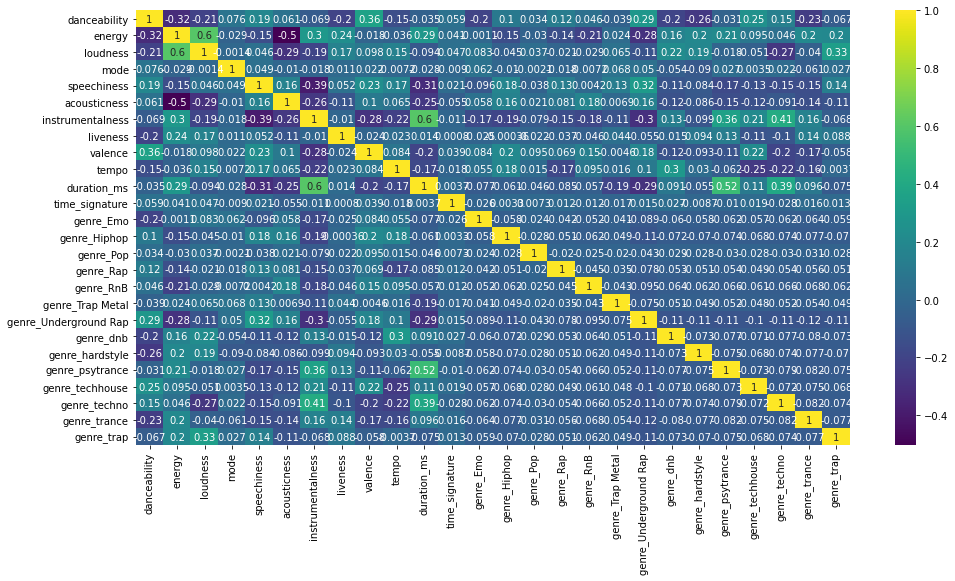

In [21]:

plt.figure(figsize=(16,8))
sns.heatmap(genres.corr(),cmap='viridis',annot=True)

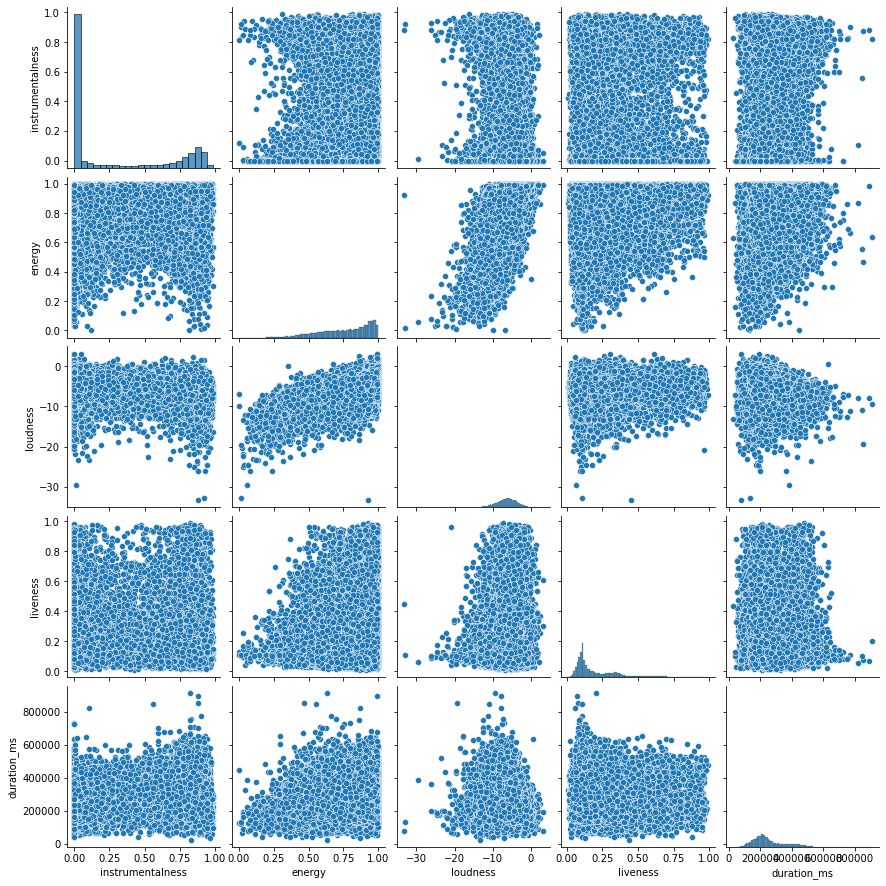

In [22]:
sns.pairplot(genres[['instrumentalness','energy', 'loudness','liveness','duration_ms']])


In [23]:
from sklearn.preprocessing import MinMaxScaler
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
normarization = genres.select_dtypes(include=datatypes)
for col in normarization.columns:
    col=MinMaxScaler(col)

<AxesSubplot:xlabel='acousticness', ylabel='energy'>

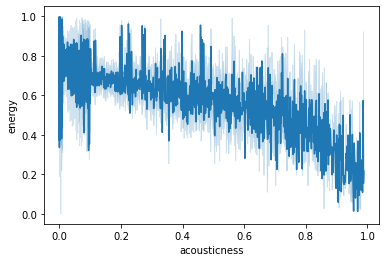

In [24]:
sns.lineplot(x='acousticness', y='energy', data=genres)
#acousticness,energy
#duration_ms, instrumentalness
#loudness, energy

<AxesSubplot:xlabel='loudness', ylabel='energy'>

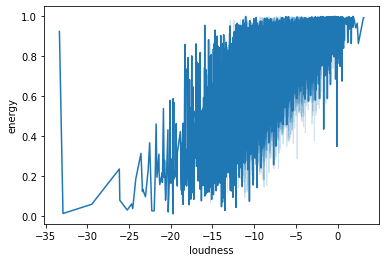

In [25]:
sns.lineplot(x='loudness', y='energy', data=genres)

In [26]:
genres.title

0                      No Title
1                      No Title
2                      No Title
3                      No Title
4                      No Title
                  ...          
35872        Euphoric Hardstyle
35873        Euphoric Hardstyle
35874    Best of Hardstyle 2020
35875        Euphoric Hardstyle
35876    Best of Hardstyle 2020
Name: title, Length: 35877, dtype: object

<h1> recommend songs based on the title</h1>

In [27]:

df_titles=genres[['title','id','song_name']]
df_titles['id'][921]

'1KlUUyAto4F6XdcTGd3ps2'

In [28]:
no_titles=df_titles[df_titles['title']=='No Title']
df_titles=df_titles[~df_titles.title.isin(no_titles['title'])]

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')

In [31]:
title_matrix = tfidf.fit_transform(df_titles['title'])

In [32]:
cosine_similarities = cosine_similarity(title_matrix) 

In [37]:
similarities = {}
for i in range(len(cosine_similarities)):
    similar_indices = cosine_similarities[i].argsort()[:-10:-1] 
    similarities[df_titles['song_name'].iloc[i]]=[(df_titles['song_name'][x],cosine_similarities[i][x]) for x in similar_indices][1:]

In [38]:
similarities['Symbiote']

<h1>content-based clustering(Clustering)</h1>

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
df=genres.drop(['title','song_name','track_href','id'],axis=1)

In [41]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [42]:
scaled_X

array([[ 1.2611313 ,  0.28227021, -0.27096752, ..., -0.28062069,
        -0.29111742, -0.26529247],
       [ 0.54300277, -1.45642248, -0.22585032, ..., -0.28062069,
        -0.29111742, -0.26529247],
       [ 1.38295668,  0.71017277,  0.59804363, ..., -0.28062069,
        -0.29111742, -0.26529247],
       ...,
       [-1.75244377,  0.32018562,  1.16402881, ..., -0.28062069,
        -0.29111742, -0.26529247],
       [-1.00866779,  0.86183444,  0.6000638 , ..., -0.28062069,
        -0.29111742, -0.26529247],
       [-0.67525098,  0.99183015,  0.23474916, ..., -0.28062069,
        -0.29111742, -0.26529247]])

In [43]:
from sklearn.cluster import KMeans

In [ ]:
ssd = []
for k in range(2,30):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

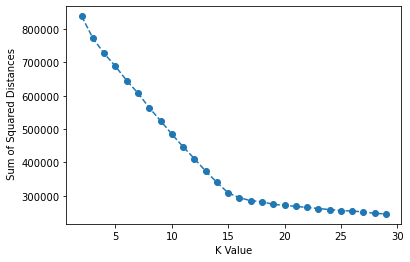

In [152]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
#15

In [165]:
model = KMeans(n_clusters=15)
model.fit(scaled_X)

KMeans(n_clusters=15)

In [166]:
df['Clusters'] = model.labels_

In [167]:
df.corr()['Clusters'].sort_values()

genre_Underground Rap   -0.428989
genre_psytrance         -0.368566
genre_Rap               -0.296865
duration_ms             -0.276554
genre_trance            -0.239485
instrumentalness        -0.183987
genre_trap              -0.153380
energy                  -0.151838
danceability            -0.126035
speechiness             -0.101654
genre_techno            -0.095113
liveness                -0.093169
time_signature          -0.028846
genre_dnb               -0.026821
loudness                 0.005242
mode                     0.007832
genre_Hiphop             0.037828
valence                  0.087242
genre_Pop                0.092650
genre_hardstyle          0.101979
tempo                    0.124253
acousticness             0.149383
genre_techhouse          0.161591
genre_Trap Metal         0.294627
genre_Emo                0.298277
genre_RnB                0.430741
Clusters                 1.000000
Name: Clusters, dtype: float64

In [168]:
predict=model.fit_predict(scaled_X)

In [169]:
genres[genres['song_name']=='Symbiote'].index

Int64Index([2], dtype='int64')

In [170]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = model.labels_

In [181]:
label=model.labels_[genres.index[genres['song_name']=='Symbiote']]
recom=cluster_map[cluster_map.cluster == label[0]].iloc[:10]


In [182]:
genres_recom=genres[genres.index.isin(recom['data_index'])]


In [184]:
genres_recom.song_name

0                              Mercury: Retrograde
1                                        Pathology
2                                         Symbiote
3    ProductOfDrugs (Prod. The Virus and Antidote)
4                                            Venom
5                                          Gatteka
6                               kamikaze (+ pulse)
7              T.R.U. (Totally Rotten Underground)
8                     I Put My Dick in Your Mental
9                                        Andromeda
Name: song_name, dtype: object